In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/home/onyxia/work/mask_detection


In [12]:
import os
import s3fs
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_auc_score ,roc_curve

from src.core.configs import settings, fs
from src.dataloader.loader import CustomImageDataset, MaskDataloaders
from src.model.base_model import BaseModel
from src.model.net_model import Net
from src.utils import get_device



device = get_device()


In [4]:
train, val= MaskDataloaders(settings.s3_prefix, 0.7).getDataloaders()

In [5]:
cd notebooks/save_model

/home/onyxia/work/mask_detection/notebooks/save_model


/home/onyxia/.cache/pypoetry/virtualenvs/mask-detection-0JYe926e-py3.10/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
net = Net(2)
base_model = BaseModel(net)

### Fit the model

In [8]:


#base_model.fit([train, val])

epoch: 0 
            Loss training:0.694 Loss validation:0.692
epoch: 1 
            Loss training:0.692 Loss validation:0.691
epoch: 2 
            Loss training:0.690 Loss validation:0.689
epoch: 3 
            Loss training:0.687 Loss validation:0.685
epoch: 4 
            Loss training:0.681 Loss validation:0.677
epoch: 5 
            Loss training:0.670 Loss validation:0.661
epoch: 6 
            Loss training:0.646 Loss validation:0.623
epoch: 7 
            Loss training:0.594 Loss validation:0.537
epoch: 8 
            Loss training:0.524 Loss validation:0.444
epoch: 9 
            Loss training:0.439 Loss validation:0.378
epoch: 10 
            Loss training:0.347 Loss validation:0.279
epoch: 11 
            Loss training:0.256 Loss validation:0.212
epoch: 12 
            Loss training:0.191 Loss validation:0.159
epoch: 13 
            Loss training:0.141 Loss validation:0.159
epoch: 14 
            Loss training:0.139 Loss validation:0.126
epoch: 15 
            Loss trainin

In [8]:
cd ../..

/home/onyxia/work/mask_detection


/home/onyxia/.cache/pypoetry/virtualenvs/mask-detection-0JYe926e-py3.10/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [9]:
base_model.load_model(path='./checkpoint/loss_validation0.073.save')

### Compute score on validation set

In [10]:
proba_list=[]
label_list=[]
for data in val:
                inputs, labels = data
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = base_model.model(inputs)
                proba= nn.Softmax()(outputs)[:,1]
                proba_list.append(proba)
                label_list.append(labels)
              

/home/onyxia/.cache/pypoetry/virtualenvs/mask-detection-0JYe926e-py3.10/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [14]:
probability= torch.concatenate(proba_list).cpu().detach().numpy()
label_true = torch.concatenate(label_list).cpu().detach().numpy()
auc_score= roc_auc_score(y_score=probability,y_true=label_true)
print('auc : ' , auc_score)
fpr, tpr, thres= roc_curve(label_true,probability)


auc :  0.9957138594254401


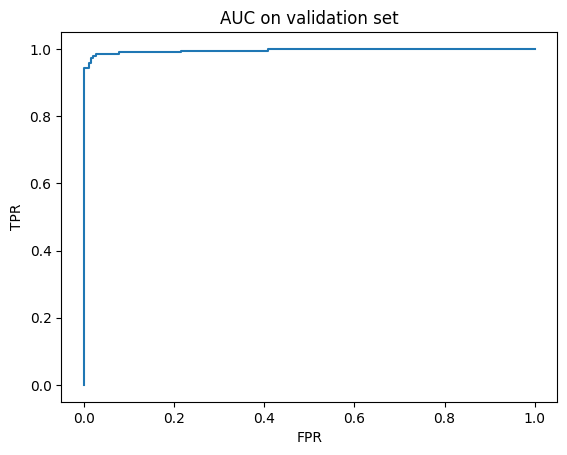

In [16]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC on validation set')
plt.show()



In [17]:
print(base_model.model)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=13456, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)
